### 8.6. 토픽 모델링 : 20 뉴스그룹 
- **LSA(잠재의미분석)** : 차원축소 후 단어의 잠재적인 의미를 끌어낸다, truncated SVD를 적용하는 경우 
- **LDA(잠재 디리클레 할당)** : 각 문서의 토픽 분포와(토픽의 수는 사용자가 정한다) 각 토픽 내의 단어 분포를 추정한다.즉 단어가 특정  토픽에 존재할 확률과 문서에 특정 토픽이 존재할 확률을 결합으로 출정하여 토픽을 추출한다. 
- LDA수행 과정 : 사용자는 알고리즘에게 토픽의 수 k를 알려준다. 모든 단어를 k중 하나의 토픽에 할당한다. 이제 모든 문서의 모든 단어에 대해 뒤의 사항을 iteration한다. +(어떤 문서의 단어 w는 잘못된 토픽에 할당되어 있다고 한다. 이에 대해 w는 두가지 기준에 따라 재할당 된다. p(topic t | document d) : 문서 d의 단어들 중 토픽 t에 해당하는 단어들의 비율, p(word w | topic t) : 단어 w를 갖고 있는 모든 문서들 중 토픽 t가 할당된 비율

In [2]:
#LDA기반 실습 
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

#topic을 사용자가 설정한다. 
cats=['rec.motorcycles', 'rec.sport.baseball', 'comp.graphics', 'comp.windows.x',
        'talk.politics.mideast', 'soc.religion.christian', 'sci.electronics', 'sci.med' ]
#cats 주제들 중에서 실제로 주제가 될 수 있는 단어만 필터링한다. 
news_df= fetch_20newsgroups(subset='all',remove=('headers', 'footers', 'quotes'), 
                            categories=cats, random_state=0)

#LDA는 count기반의 vectorize만 적용한다. 
count_vect=CountVectorizer(max_df=0.95, max_features=1000, min_df=2, stop_words='english', ngram_range=(1,2))
feat_vect=count_vect.fit_transform(news_df.data)
print(feat_vect.shape)

(7862, 1000)


In [4]:
#LDA적용
lda=LatentDirichletAllocation(n_components=8, random_state=0)
lda.fit(feat_vect)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=8, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [7]:
#토픽을 연관성이 있는 순서대로 뽑아보는 방법 
def display_topics(model, feature_names, no_top_words):
    for topic_index, topic in enumerate(model.components_):
        print('Topic #',topic_index)

        # components_ array에서 가장 값이 큰 순으로 정렬했을 때, 그 값의 array index를 반환. 
        topic_word_indexes = topic.argsort()[::-1]
        top_indexes=topic_word_indexes[:no_top_words]
        
        # top_indexes대상인 index별로 feature_names에 해당하는 word feature 추출 후 join으로 concat
        feature_concat = ' '.join([feature_names[i] for i in top_indexes])                
        print(feature_concat)

In [8]:
#countvectorize방법을 통해 추출한다. 
feature_names = count_vect.get_feature_names()
#연관성이 높은 word만 15개를 추출한다. 
display_topics(lda, feature_names, 15)

Topic # 0
year 10 game medical health team 12 20 disease cancer 1993 games years patients good
Topic # 1
don just like know people said think time ve didn right going say ll way
Topic # 2
image file jpeg program gif images output format files color entry 00 use bit 03
Topic # 3
like know don think use does just good time book read information people used post
Topic # 4
armenian israel armenians jews turkish people israeli jewish government war dos dos turkey arab armenia 000
Topic # 5
edu com available graphics ftp data pub motif mail widget software mit information version sun
Topic # 6
god people jesus church believe christ does christian say think christians bible faith sin life
Topic # 7
use dos thanks windows using window does display help like problem server need know run


- 다른 형태의 LDA모델링 예시 확인 : https://wikidocs.net/40710

### 8.7. 문서 군집화소개와 실습 (opinion review데이터)
- 문서 군집화는 비슷한 텍스트 구성의 문서를 군집화하는 것이다. 앞에서 했던 텍스트 분류 기반의 문서 분류는 label이 필요한 지도학습이었다면
- 문서 군집화는 비지도 학습에 속한다.(학습데이터가 필요가 없다), 어차피 토큰화 이후에 kmeans로 군집화할 예정이므로 

In [9]:
import pandas as pd
import glob, os
#파일이 있는 절대경로를 지정
path=r'C:\Users\user\Downloads\OpinosisDataset1.0\OpinosisDataset1.0\topics'
#path로 지정한 디렉토리 아래에 있는 모든 파일을 다운 
all_files = glob.glob(os.path.join(path, "*.data"))    
filename_list = []
opinion_text = []

In [12]:
import warnings
warnings.filterwarnings('ignore')
#개별 파일의 파일명, 파일 내용을 따로 저장한다. 
#데이터프레임 변환 
for file_ in all_files:
    # 개별 파일을 읽어서 DataFrame으로 생성 
    df = pd.read_table(file_,index_col=None, header=0,encoding='latin1')
    
    # 절대경로로 주어진 file 명을 가공. 만일 Linux에서 수행시에는 아래 \\를 / 변경. 맨 마지막 .data 확장자도 제거
    filename_ = file_.split('\\')[-1]
    filename = filename_.split('.')[0]

    #파일명 리스트와 파일내용 리스트에 파일명과 파일 내용을 추가. 
    filename_list.append(filename)
    opinion_text.append(df.to_string())

# 파일명 리스트와 파일내용 리스트를  DataFrame으로 생성
document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})
document_df.head()

,filename,opinion_text
0,accuracy_garmin_nuvi_255W_gps,", and is very, very acc..."
1,bathroom_bestwestern_hotel_sfo,"The room was not overly big, but clean and..."
2,battery-life_amazon_kindle,After I plugged it in to my USB hub on my ...
3,battery-life_ipod_nano_8gb,short battery life I moved up from a...
4,battery-life_netbook_1005ha,"6GHz 533FSB cpu, glossy display, 3, Cell 2..."


In [13]:
#TF_IDF기반의 벡터화 이후에 tokenizer는 Lemmatization을 구현
#Lemmatization함수 코드는 참고하기 
from nltk.stem import WordNetLemmatizer
import nltk
import string

remove_punct_dict=dict((ord(punct), None) for punct in string.punctuation)
lemmar=WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]
def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [14]:
#Lemaatization을 기반으로한 TF_IDF벡터 변환
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english' , \
                             ngram_range=(1,2), min_df=0.05, max_df=0.85 )

#opinion_text 컬럼값으로 feature vectorization 수행
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

In [17]:
#벡터화한 데이터로 kmearns작성
#문서 군집화는 kmearns
from sklearn.cluster import KMeans
km_cluster=KMeans(n_clusters=5, max_iter=1000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label=km_cluster.labels_
cluster_centers=km_cluster.cluster_centers_

In [18]:
#생성한 label붙여서 확인 
document_df['cluster_label']= cluster_label
document_df.head()

,filename,opinion_text,cluster_label
0,accuracy_garmin_nuvi_255W_gps,", and is very, very acc...",4
1,bathroom_bestwestern_hotel_sfo,"The room was not overly big, but clean and...",3
2,battery-life_amazon_kindle,After I plugged it in to my USB hub on my ...,1
3,battery-life_ipod_nano_8gb,short battery life I moved up from a...,1
4,battery-life_netbook_1005ha,"6GHz 533FSB cpu, glossy display, 3, Cell 2...",1


In [19]:
#군집화 결과 확인하기 
#cluster0확인
document_df[document_df['cluster_label']==0].sort_values(by='filename')

,filename,opinion_text,cluster_label
15,free_bestwestern_hotel_sfo,The wine reception is a great idea as it i...,0
66,free_bestwestern_hotel_sfo,The wine reception is a great idea as it i...,0
45,staff_bestwestern_hotel_sfo,Staff are friendly and hel...,0
96,staff_bestwestern_hotel_sfo,Staff are friendly and hel...,0
46,staff_swissotel_chicago,The staff at Swissotel were not particula...,0
97,staff_swissotel_chicago,The staff at Swissotel were not particula...,0


In [20]:
document_df[document_df['cluster_label']==1].sort_values(by='filename')

,filename,opinion_text,cluster_label
2,battery-life_amazon_kindle,After I plugged it in to my USB hub on my ...,1
53,battery-life_amazon_kindle,After I plugged it in to my USB hub on my ...,1
3,battery-life_ipod_nano_8gb,short battery life I moved up from a...,1
54,battery-life_ipod_nano_8gb,short battery life I moved up from a...,1
4,battery-life_netbook_1005ha,"6GHz 533FSB cpu, glossy display, 3, Cell 2...",1
55,battery-life_netbook_1005ha,"6GHz 533FSB cpu, glossy display, 3, Cell 2...",1
11,features_windows7,"I had to uninstall anti, virus and selecte...",1
62,features_windows7,"I had to uninstall anti, virus and selecte...",1
19,keyboard_netbook_1005ha,", I think the new keyboard rivals the gre...",1
70,keyboard_netbook_1005ha,", I think the new keyboard rivals the gre...",1


In [21]:
document_df[document_df['cluster_label']==2].sort_values(by='filename')

,filename,opinion_text,cluster_label
6,comfort_honda_accord_2008,"Drivers seat not comfortable, the car its...",2
57,comfort_honda_accord_2008,"Drivers seat not comfortable, the car its...",2
7,comfort_toyota_camry_2007,Ride seems comfortable and gas mileage fa...,2
58,comfort_toyota_camry_2007,Ride seems comfortable and gas mileage fa...,2
16,gas_mileage_toyota_camry_2007,Ride seems comfortable and gas mileage fa...,2
67,gas_mileage_toyota_camry_2007,Ride seems comfortable and gas mileage fa...,2
17,interior_honda_accord_2008,I love the new body style and the interior...,2
68,interior_honda_accord_2008,I love the new body style and the interior...,2
18,interior_toyota_camry_2007,"First of all, the interior has way too ma...",2
69,interior_toyota_camry_2007,"First of all, the interior has way too ma...",2


In [22]:
document_df[document_df['cluster_label']==3].sort_values(by='filename')

,filename,opinion_text,cluster_label
1,bathroom_bestwestern_hotel_sfo,"The room was not overly big, but clean and...",3
52,bathroom_bestwestern_hotel_sfo,"The room was not overly big, but clean and...",3
13,food_holiday_inn_london,The room was packed to capacity with queu...,3
64,food_holiday_inn_london,The room was packed to capacity with queu...,3
14,food_swissotel_chicago,The food for our event was deli...,3
65,food_swissotel_chicago,The food for our event was deli...,3
20,location_bestwestern_hotel_sfo,"Good Value good location , ideal ...",3
71,location_bestwestern_hotel_sfo,"Good Value good location , ideal ...",3
21,location_holiday_inn_london,Great location for tube and we crammed in...,3
72,location_holiday_inn_london,Great location for tube and we crammed in...,3


In [23]:
document_df[document_df['cluster_label']==4].sort_values(by='filename')

,filename,opinion_text,cluster_label
0,accuracy_garmin_nuvi_255W_gps,", and is very, very acc...",4
51,accuracy_garmin_nuvi_255W_gps,", and is very, very acc...",4
56,buttons_amazon_kindle,I thought it would be fitting to christen ...,4
5,buttons_amazon_kindle,I thought it would be fitting to christen ...,4
59,directions_garmin_nuvi_255W_gps,You also get upscale features like spoken ...,4
8,directions_garmin_nuvi_255W_gps,You also get upscale features like spoken ...,4
9,display_garmin_nuvi_255W_gps,3 quot widescreen display was a ...,4
60,display_garmin_nuvi_255W_gps,3 quot widescreen display was a ...,4
10,eyesight-issues_amazon_kindle,It feels as easy to read as the K1 but doe...,4
61,eyesight-issues_amazon_kindle,It feels as easy to read as the K1 but doe...,4


In [26]:
#너무 세세한 분야로 cluster되었으므로, 3개로 다시 군집화 한다. 
from sklearn.cluster import KMeans
#3개의 집합으로 군집화 
km_cluster=KMeans(n_clusters=3, max_iter=1000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label=km_cluster.labels_

#소속 클러스터를 cluster_label기준으로 정렬하고 cluster_label을 정렬한다. 
document_df['cluster_label'] = cluster_label
document_df.sort_values(by='cluster_label').head(3)

,filename,opinion_text,cluster_label
0,accuracy_garmin_nuvi_255W_gps,", and is very, very acc...",0
36,screen_netbook_1005ha,Keep in mind that once you get in a room ...,0
41,size_asus_netbook_1005ha,A few other things I'd like to point out i...,0


각 군집을 구성하는 핵심 단어 추출하기 <br>
cluster_center간의 거리를 측정하여 핵심단어를 추출한다 

In [28]:
#cluster_centers간의 거리를 추출한다. 
#중심을 기준으로 가깝게 배치된 거리를 확인한다. 
cluster_centers=km_cluster.cluster_centers_
print('cluster_centers shape:', cluster_centers.shape)
print(cluster_centers)

cluster_centers shape: (3, 2409)
[[0.018109   0.         0.         ... 0.         0.         0.0048106 ]
 [0.         0.00139709 0.         ... 0.         0.         0.        ]
 [0.         0.00174184 0.0026023  ... 0.00331835 0.00357495 0.        ]]


cluster_centers shape: (3, 2409) = 3개의 군집이 구성되면서 각 군집에는 2409개의 feature이 들어있다. <br>
결괏값을 해결하는 함수를 지정한다. cluster_centers_배열 내에서 가장 값이 큰 인덱스 값을 뽑아 해당 인덱스를 사용하여 핵심단어 이름과 그 뗴의 상대 위치 값을 추출하여 처리하는 함수를 지정한다. 

In [47]:
# 군집별 top n 핵심단어, 그 단어의 중심 위치 상대값, 대상 파일명들을 반환함. 
def get_cluster_details(cluster_model, cluster_data, feature_names, clusters_num, top_n_features=10):
    cluster_details = {}
    
    # cluster_centers array 의 값이 큰 순으로 정렬된 index 값을 반환
    # 군집 중심점(centroid)별 할당된 word 피처들의 거리값이 큰 순으로 값을 구하기 위함.  
    centroid_feature_ordered_ind = cluster_model.cluster_centers_.argsort()[:,::-1]
    
    #개별 군집별로 iteration하면서 핵심단어, 그 단어의 중심 위치 상대값, 대상 파일명 입력
    for cluster_num in range(clusters_num):
        # 개별 군집별 정보를 담을 데이터 초기화. 
        cluster_details[cluster_num] = {}
        cluster_details[cluster_num]['cluster'] = cluster_num
        
        # cluster_centers_.argsort()[:,::-1] 로 구한 index 를 이용하여 top n 피처 단어를 구함. 
        top_feature_indexes = centroid_feature_ordered_ind[cluster_num, :top_n_features]
        top_features = [ feature_names[ind] for ind in top_feature_indexes ]
        
        # top_feature_indexes를 이용해 해당 피처 단어의 중심 위치 상댓값 구함 
        top_feature_values = cluster_model.cluster_centers_[cluster_num, top_feature_indexes].tolist()
        
        # cluster_details 딕셔너리 객체에 개별 군집별 핵심 단어와 중심위치 상대값, 그리고 해당 파일명 입력
        cluster_details[cluster_num]['top_features'] = top_features
        cluster_details[cluster_num]['top_features_value'] = top_feature_values
        filenames = cluster_data[cluster_data['cluster_label'] == cluster_num]['filename']
        filenames = filenames.values.tolist()
        cluster_details[cluster_num]['filenames'] = filenames
        
    return cluster_details

In [48]:
#결과를 프린트해주는 함수의 작성 
def print_cluster_details(cluster_details):
    for cluster_num, cluster_detail in cluster_details.items():
        print('####### Cluster {0}'.format(cluster_num))
        print('Top features:', cluster_detail['top_features'])
        print('Reviews 파일명 :',cluster_detail['filenames'][:7])
        print('==================================================')


In [49]:
#각 파일당 결과를 확인한다. 
feature_names=tfidf_vect.get_feature_names()
cluster_details = get_cluster_details(cluster_model=km_cluster, cluster_data=document_df,\
                                  feature_names=feature_names, clusters_num=3, top_n_features=10 )
print_cluster_details(cluster_details)

####### Cluster 0
Top features: ['screen', 'battery', 'life', 'battery life', 'keyboard', 'kindle', 'size', 'button', 'easy', 'voice']
Reviews 파일명 : ['accuracy_garmin_nuvi_255W_gps', 'battery-life_amazon_kindle', 'battery-life_ipod_nano_8gb', 'battery-life_netbook_1005ha', 'buttons_amazon_kindle', 'directions_garmin_nuvi_255W_gps', 'display_garmin_nuvi_255W_gps']
####### Cluster 1
Top features: ['room', 'hotel', 'service', 'location', 'staff', 'food', 'clean', 'bathroom', 'parking', 'room wa']
Reviews 파일명 : ['bathroom_bestwestern_hotel_sfo', 'food_holiday_inn_london', 'food_swissotel_chicago', 'free_bestwestern_hotel_sfo', 'location_bestwestern_hotel_sfo', 'location_holiday_inn_london', 'parking_bestwestern_hotel_sfo']
####### Cluster 2
Top features: ['interior', 'seat', 'mileage', 'comfortable', 'car', 'gas', 'gas mileage', 'comfort', 'ride', 'performance']
Reviews 파일명 : ['comfort_honda_accord_2008', 'comfort_toyota_camry_2007', 'gas_mileage_toyota_camry_2007', 'interior_honda_accord_

### 8.8.문서 유사도 
- 문서간 유사도 측정방식에 사용하는 방식은 **코사인 유사도 방식**이다. 
- 벡터의 크기보다는 벡터의 상호방향석이 얼마나 유사한지에 기반하여 작성하는 방법이다. 
- 희소행렬상에서도 구현이 가능하기 떄문에 이 방식을 사용한다 


- 1.**cos_simiarity()**를 정의에 기반하여 작성하는 경우, 희소행렬을 밀집행렬로 변환하여 각 특징을 추출한 후 유사도를 계산해야 한다. 
- 2.**cosine_simiarity()** API를 직접 사용하는 경우 

In [32]:
#cos_simiarty를 직접 작성하여 사용하는 경우 
import numpy as np
def cos_similarity(v1, v2):
    dot_product=np.dot(v1, v2) #분자 
    l2_norm=(np.sqrt(sum(np.square(v1))) * np.sqrt(sum(np.square(v2))))
    similarity=dot_product/l2_norm
    return similarity

In [33]:
#데이터를 불러오고, 각 데이터에 대해 벡터화하는 경우 
#문장의 벡터화 
from sklearn.feature_extraction.text import TfidfVectorizer
doc_list = ['if you take the blue pill, the story ends' ,
            'if you take the red pill, you stay in Wonderland',
            'if you take the red pill, I show you how deep the rabbit hole goes']

tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)
print(feature_vect_simple.shape)

(3, 18)


In [34]:
#밀집행렬 변환 
feature_vect_dense = feature_vect_simple.todense()

#특징을 추출
vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
vect2 = np.array(feature_vect_dense[1]).reshape(-1,)

#첫번째 문장과 두번째 문장의 feature vector로 두개 문장의 Cosine 유사도 추출
similarity_simple = cos_similarity(vect1, vect2 )
print('문장 1, 문장 2 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장 1, 문장 2 Cosine 유사도: 0.402


In [35]:
#cosine_similariy API를 사용하는 경우 
from sklearn.metrics.pairwise import cosine_similarity
similarity_simple_pair = cosine_similarity(feature_vect_simple[0] , feature_vect_simple)
print(similarity_simple_pair)

[[1.         0.40207758 0.40425045]]


In [36]:
#전체를 기준으로 하는 경우 
similarity_simple_pair = cosine_similarity(feature_vect_simple , feature_vect_simple)
print(similarity_simple_pair)
print('shape:',similarity_simple_pair.shape)

[[1.         0.40207758 0.40425045]
 [0.40207758 1.         0.45647296]
 [0.40425045 0.45647296 1.        ]]
shape: (3, 3)


opinion revies 데이터셋을 이용한 문서 유사도 측정<br>


- 앞에서의 대아터를 활용하여 '호텔'을 주제로 군짖화된 문서를 사용해 특정문서와 다른 문서와의 유사도를 측정한다. 
- 호텔을 주제로 군집화된 데이터를 먼저 추출하고 이 데이터에 해당하는 TfidfVectorizer의 데이터를 추출한다. 

In [39]:
#토큰화 함수의 사용 
from nltk.stem import WordNetLemmatizer
import nltk
import string

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [40]:
#유사도 측정을 위해 파일 내용과 label정리하는 방법
import pandas as pd
import glob, os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

path=r'C:\Users\user\Downloads\OpinosisDataset1.0\OpinosisDataset1.0\topics'
all_files=glob.glob(os.path.join(path,'*.data'))
filename_list=[]
opinion_text=[]

for file_ in all_files:
    df = pd.read_table(file_,index_col=None, header=0,encoding='latin1')
    filename_ = file_.split('\\')[-1]
    filename = filename_.split('.')[0]
    filename_list.append(filename)
    opinion_text.append(df.to_string())

document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})

tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english' , \
                             ngram_range=(1,2), min_df=0.05, max_df=0.85 )
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label'] = cluster_label

In [42]:
#기존의 문서와의 유사도를 측정하는 방법
from sklearn.metrics.pairwise import cosine_similarity

#해당 class에 속하는 인덱스를 추출하는 경우 
hotel_indexes = document_df[document_df['cluster_label']==1].index
print('호텔로 클러스터링 된 문서들의 DataFrame Index:', hotel_indexes)

''' document_df에서 추출한 Index 객체를 feature_vect로 입력하여 호텔 클러스터링된 feature_vect 추출 
이를 이용하여 호텔로 클러스터링된 문서 중 첫번째 문서와 다른 문서간의 코사인 유사도 측정.'''
similarity_pair = cosine_similarity(feature_vect[hotel_indexes[0]] , feature_vect[hotel_indexes])
print(similarity_pair)

호텔로 클러스터링 된 문서들의 DataFrame Index: Int64Index([1, 13, 14, 15, 20, 21, 24, 28, 30, 31, 32, 38, 39, 40, 45, 46], dtype='int64')
[[1.         0.05907195 0.05404862 0.03739629 0.06629355 0.06734556
  0.04017338 0.13113702 0.41011101 0.3871916  0.57253197 0.10600704
  0.13058128 0.1602411  0.05539602 0.05839754]]


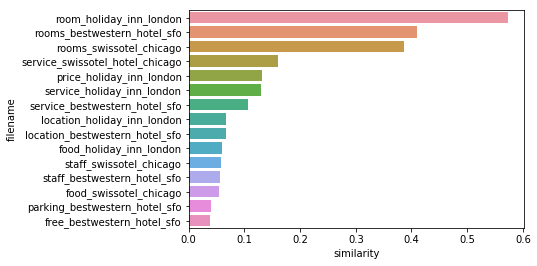

In [44]:
#문서간 유사도를 분석하는 방법

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# argsort()를 이용하여 앞예제의 첫번째 문서와 타 문서간 유사도가 큰 순으로 정렬한 인덱스 반환하되 자기 자신은 제외. 
sorted_index = similarity_pair.argsort()[:,::-1]
sorted_index = sorted_index[:, 1:]

# 유사도가 큰 순으로 hotel_indexes를 추출하여 재 정렬. 
hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1)]

# 유사도가 큰 순으로 유사도 값을 재정렬하되 자기 자신은 제외
hotel_1_sim_value = np.sort(similarity_pair.reshape(-1))[::-1]
hotel_1_sim_value = hotel_1_sim_value[1:]

# 유사도가 큰 순으로 정렬된 Index와 유사도값을 이용하여 파일명과 유사도값을 Seaborn 막대 그래프로 시각화
hotel_1_sim_df = pd.DataFrame()
hotel_1_sim_df['filename'] = document_df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['similarity'] = hotel_1_sim_value

sns.barplot(x='similarity', y='filename',data=hotel_1_sim_df)


### 8.9. 한글 텍스트 처리 : 네이버 영화 평점감성분석
- konlpy설치 오류시 참고 : https://m.blog.naver.com/kiddwannabe/221795961189

In [4]:
!pip install konlpy
import pandas as pd
train_df=pd.read_csv('ratings_train.txt', sep='\t')
train_df.head(3)

  Using cached https://files.pythonhosted.org/packages/85/0e/f385566fec837c0b83f216b2da65db9997b35dd675e107752005b7d392b1/konlpy-0.5.2-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/9e/d4/10f46e5cfac773e22707237bfcd51bbffeaf0a576b0a847ec7ab15bd7ace/beautifulsoup4-4.6.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/36/1b/2bd38043d22ade352fc3d3902cf30ce0e2f4bf285be3b304a2782a767aec/tweepy-3.8.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/a3/12/b92740d845ab62ea4edf04d2f4164d82532b5a0b03836d4d4e71c6f3d379/requests_oauthlib-1.3.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/05/57/ce2e7a8fa7c0afb54a0581b14a65b56e62b5759dbc98e80627142b8a3704/oauthlib-3.1.0-py2.py3-none-any.whl
  Found existing installation: beautifulsoup4 4.7.1
    Uninstalling beautifulsoup4-4.7.1:
      Successfully uninstalled beautifulsoup4-4.7.1


,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0


In [5]:
#긍부정을 의미하는 label값 참고하기 
train_df['label'].value_counts()

0    75173
1    74827
Name: label, dtype: int64

In [6]:
#리뷰데이터에 대해 숫자는 단어적인 의미가 없으므로 공백으로 변환
import re

train_df = train_df.fillna(' ')
# 정규 표현식을 이용하여 숫자를 공백으로 변경(정규 표현식으로 \d 는 숫자를 의미함.) 
train_df['document'] = train_df['document'].apply( lambda x : re.sub(r"\d+", " ", x) )

# 테스트 데이터 셋을 로딩하고 동일하게 Null 및 숫자를 공백으로 변환
test_df = pd.read_csv('ratings_test.txt', sep='\t')
test_df = test_df.fillna(' ')
test_df['document'] = test_df['document'].apply( lambda x : re.sub(r"\d+", " ", x) )

In [9]:
#단어벡터화 이후에 토큰화 진행
from konlpy.tag import Twitter

twitter=Twitter()
def tw_tokenizer(text):
    #입력입자로 들어온 text를 형태로 단위로 토큰화형태의 리스틀 저장하게 하는 함수 반환 
    tokens_ko=twitter.morphs(text)
    return tokens_ko

```python
#sklearn의 TF-IDF피처모델을 생성한다. 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Twitter 객체의 morphs( ) 객체를 이용한 tokenizer를 사용. ngram_range는 (1,2) 
tfidf_vect = TfidfVectorizer(tokenizer=tw_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.9)
tfidf_vect.fit(train_df['document'])
tfidf_matrix_train = tfidf_vect.transform(train_df['document'])
```

```python
#로지스틱 회귀를 사용하여 감정분석을 시행한다. 
# Logistic Regression 을 이용하여 감성 분석 Classification 수행. 
lg_clf = LogisticRegression(random_state=0)

# Parameter C 최적화를 위해 GridSearchCV 를 이용. 
params = { 'C': [1 ,3.5, 4.5, 5.5, 10 ] }
grid_cv = GridSearchCV(lg_clf , param_grid=params , cv=3 ,scoring='accuracy', verbose=1 )
grid_cv.fit(tfidf_matrix_train , train_df['label'] )
print(grid_cv.best_params_ , round(grid_cv.best_score_,4))
```

```python
#ml모델에 대한 정확도의 확인
from sklearn.metric import accuracy_score
# 학습 데이터를 적용한 TfidfVectorizer를 이용하여 테스트 데이터를 TF-IDF 값으로 Feature 변환함. 
tfidf_matrix_test = tfidf_vect.transform(test_df['document'])

# classifier 는 GridSearchCV에서 최적 파라미터로 학습된 classifier를 그대로 이용
best_estimator = grid_cv.best_estimator_
preds = best_estimator.predict(tfidf_matrix_test)

print('Logistic Regression 정확도: ',accuracy_score(test_df['label'],preds))
```

- 마지막 텍스트 분서 실습 : kaggle의 mercari price suggestion challenge 분석대회 참여해보기